In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import yaml
import os
from copy import deepcopy

In [2]:
def loadYaml(filename):

    with open(filename, 'r') as file:
        month_dict = yaml.load(file, Loader=yaml.FullLoader)
    return month_dict

In [3]:
def getCount(target_dict):
    count = 0
    for key in target_dict.keys():
        # Get the count
        # count += target_dict[key]['count']
        
        # Count the amount of titles
        # print(len(target_dict[key]['title']))
        count += len(target_dict[key]['title'])
        
    return count

In [4]:
def getDayCount(month_dict, day):
    return getCount(month_dict[day])

In [5]:
def getOverallCount(month_dict, return_dict=False):
    if return_dict:
        overall_count = {}
        for day in month_dict:
            overall_count[key] = getDayCount(month_dict, day)
        return overall_count
    else:
        overall_count=[]
        for day in month_dict:
            overall_count.append(getDayCount(month_dict, day))
        return overall_count
        

In [6]:
def load_all_data(path):
    data = {}
    for file in os.listdir(path):
        if file.split('.')[-1] == 'yaml':
            print("Loading {0}".format(file))
            data[file.split('_')[0]] = loadYaml(os.path.join(path,file))
    return deepcopy(data)

In [7]:
data = loadYaml("final_data/Jan_AI_2020.yaml")

In [8]:
counts = getOverallCount(data)

In [9]:
print(counts)

[790, 1076, 940, 867, 971, 1052, 1088, 993, 1092, 983, 765, 842, 932, 987, 926, 987, 1004, 863, 821, 951, 851, 970, 897, 864, 801, 847, 891, 914, 998, 977, 941]


In [10]:
print(np.arange(1,len(counts)+1))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


<BarContainer object of 31 artists>

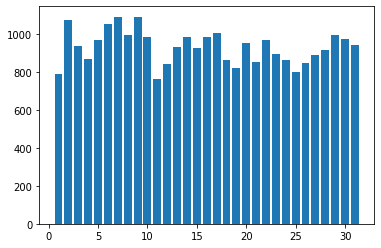

In [12]:
plt.bar(np.arange(1,len(counts)+1),counts)

In [13]:
data = load_all_data("final_data")

Loading Dez_AI_2020.yaml
Loading Sep_AI_2020.yaml
Loading Mar_AI_2020.yaml
Loading Oct_AI_2020.yaml
Loading Nov_AI_2020.yaml
Loading Jun_AI_2020.yaml
Loading Aug_AI_2020.yaml
Loading Jan_AI_2020.yaml
Loading Feb_AI_2020.yaml
Loading May_AI_2020.yaml
Loading Apr_AI_2020.yaml
Loading Jul_AI_2020.yaml


In [14]:
months = ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun','Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dez']
data_array = []
for month in months:
    data_array.append(getOverallCount(data[month]))

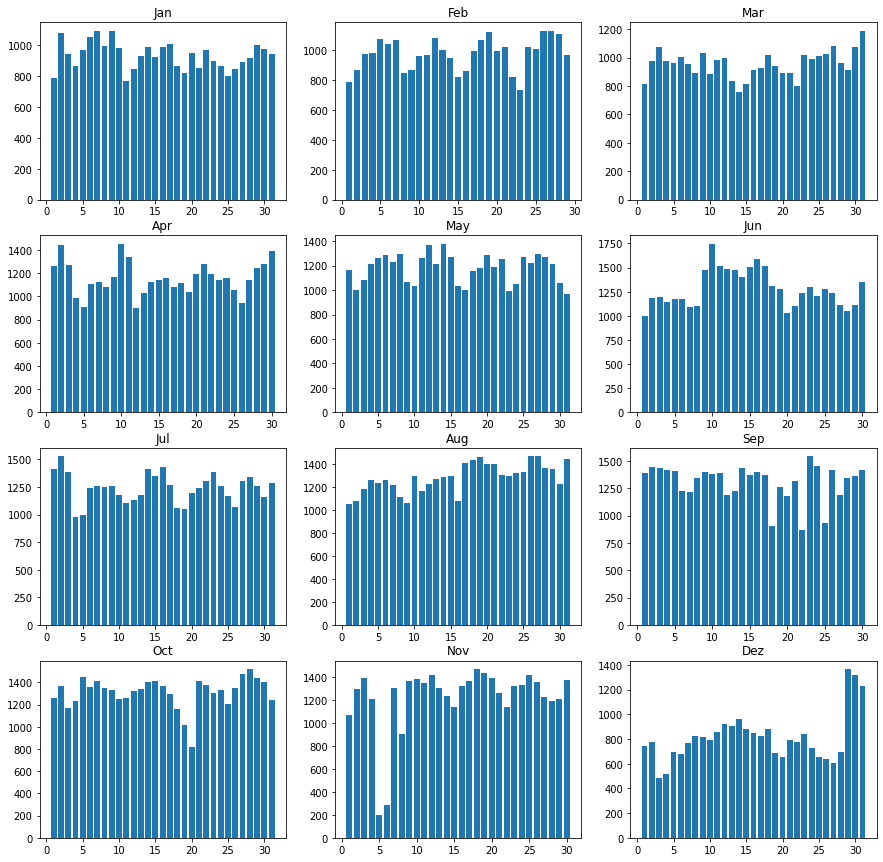

In [16]:
fig,axs = plt.subplots(4,3, figsize=(15,15))
monthcount = 0
for ax in axs:
    ax[0].bar(np.arange(1,len(data_array[monthcount])+1),height=data_array[monthcount])
    ax[0].set_title(months[monthcount])
    monthcount += 1
    ax[1].bar(np.arange(1,len(data_array[monthcount])+1),height=data_array[monthcount])
    ax[1].set_title(months[monthcount])
    monthcount += 1
    ax[2].bar(np.arange(1,len(data_array[monthcount])+1),height=data_array[monthcount])
    ax[2].set_title(months[monthcount])
    monthcount += 1

plt.savefig("AllMonths-Length.png")